In [0]:
# A Backtracking program  in Python to solve Sudoku problem 
  
  
  
          
# Function to Find the entry in the Grid that is still  not used 
# Searches the grid to find an entry that is still unassigned. If 
# found, the reference parameters row, col will be set the location 
# that is unassigned, and true is returned. If no unassigned entries 
# remain, false is returned. 
# 'l' is a list  variable that has been passed from the solve_sudoku function 
# to keep track of incrementation of Rows and Columns 
def find_empty_location(arr,l): 
    for row in range(9): 
        for col in range(9): 
            if(arr[row][col]==0): 
                l[0]=row 
                l[1]=col 
                return True
    return False
  
# Returns a boolean which indicates whether any assigned entry 
# in the specified row matches the given number. 
def used_in_row(arr,row,num): 
    for i in range(9): 
        if(arr[row][i] == num): 
            return True
    return False
  
# Returns a boolean which indicates whether any assigned entry 
# in the specified column matches the given number. 
def used_in_col(arr,col,num): 
    for i in range(9): 
        if(arr[i][col] == num): 
            return True
    return False
  
# Returns a boolean which indicates whether any assigned entry 
# within the specified 3x3 box matches the given number 
def used_in_box(arr,row,col,num): 
    for i in range(3): 
        for j in range(3): 
            if(arr[i+row][j+col] == num): 
                return True
    return False
  
# Checks whether it will be legal to assign num to the given row,col 
#  Returns a boolean which indicates whether it will be legal to assign 
#  num to the given row,col location. 
def check_location_is_safe(arr,row,col,num): 
      
    # Check if 'num' is not already placed in current row, 
    # current column and current 3x3 box 
    return not used_in_row(arr,row,num) and not used_in_col(arr,col,num) and not used_in_box(arr,row - row%3,col - col%3,num) 
  
# Takes a partially filled-in grid and attempts to assign values to 
# all unassigned locations in such a way to meet the requirements 
# for Sudoku solution (non-duplication across rows, columns, and boxes) 
def solve_sudoku(arr): 
      
    # 'l' is a list variable that keeps the record of row and col in find_empty_location Function     
    l=[0,0] 
      
    # If there is no unassigned location, we are done     
    if(not find_empty_location(arr,l)): 
        return True
      
    # Assigning list values to row and col that we got from the above Function  
    row=l[0] 
    col=l[1] 
      
    # consider digits 1 to 9 
    for num in range(1,10): 
          
        # if looks promising 
        if(check_location_is_safe(arr,row,col,num)): 
              
            # make tentative assignment 
            arr[row][col]=num 
  
            # return, if success, ya! 
            if(solve_sudoku(arr)): 
                return True
  
            # failure, unmake & try again 
            arr[row][col] = 0
              
    # this triggers backtracking         
    return False 

In [2]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.3-py2.py3-none-any.whl size=13396 sha256=6668a946fefdcd9a1ab3d999eefbcc44edc508ec40c50459a63a5e5d8e535580
  Stored in directory: /root/.cache/pip/wheels/82/1a/d0/a884540a5602305f5bb7ff44f05550be20453edce8fae69241
Successfully built pytesseract


In [0]:
import pandas as pd
import numpy as np
import cv2
#from cv2 import cv2.imshow
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

import tensorflow as tf

In [5]:

img = Image.open('sudoku.png').convert('LA')

array = np.array(img)[:,:,0]

array.shape


(1200, 1200)

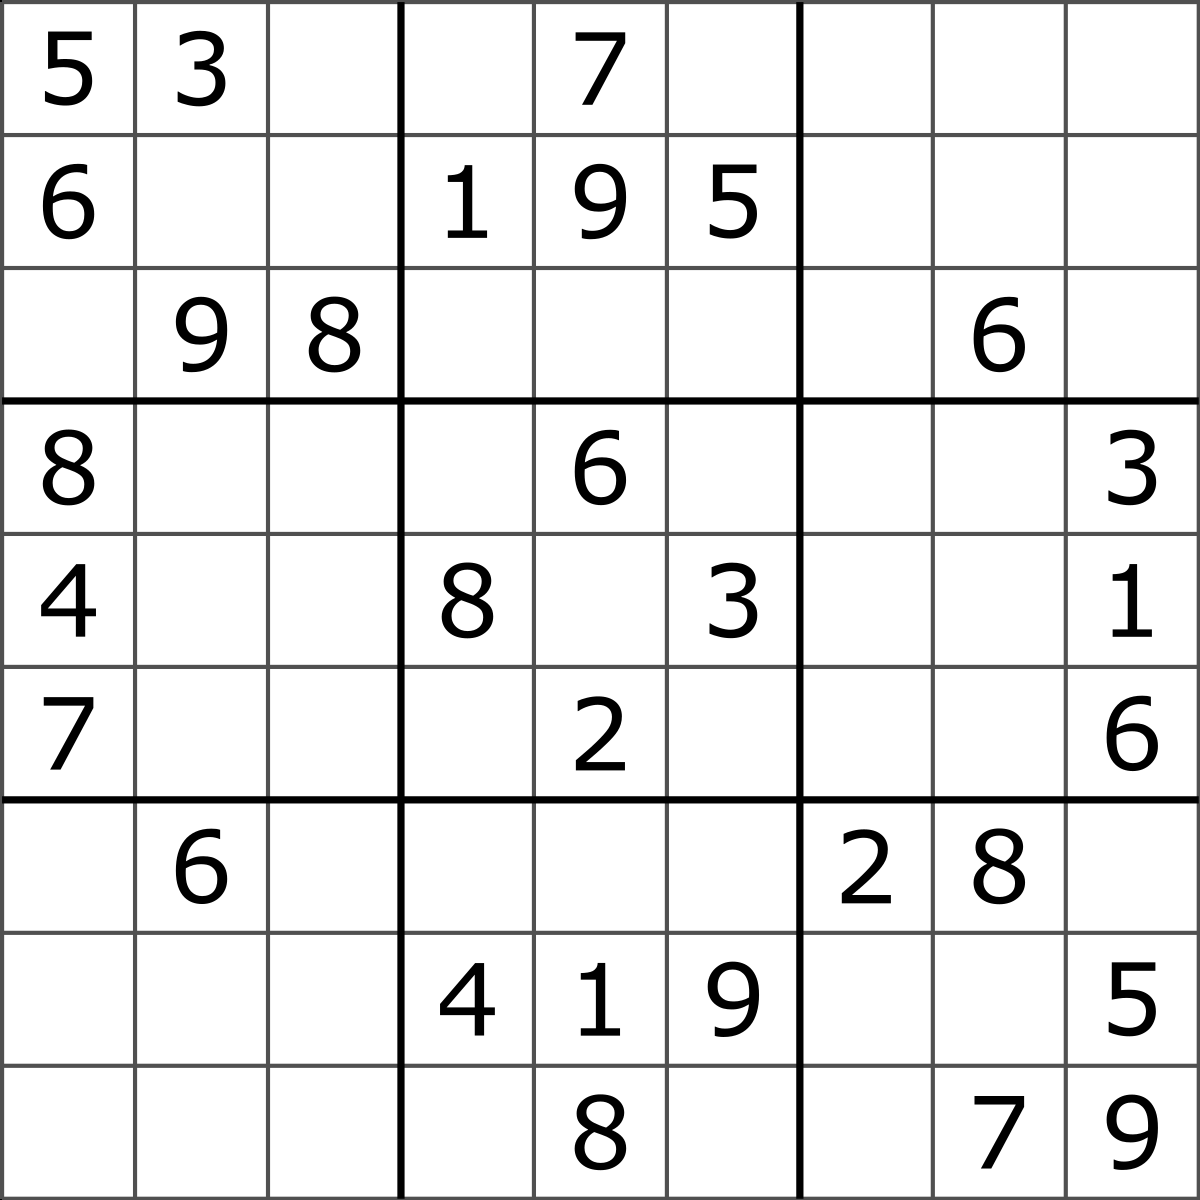

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(array);

In [0]:
array = 255-array

divisor = array.shape[0]//9

puzzle = []
for i in range(9):
    row = []
    for j in range(9):
        #slice image, reshape it to 28x28 (mnist reader size)
        row.append(cv2.resize(array[i*divisor:(i+1)*divisor,
                                    j*divisor:(j+1)*divisor][3:-3, 3:-3], 
                              dsize=(28,28), 
                              interpolation=cv2.INTER_CUBIC))
    puzzle.append(row)

In [8]:
#cv2_imshow(puzzle[0][3]),
cv2_imshow(puzzle[0][4]*255)

In [9]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32')/255

series = pd.Series(train_labels)
dummies = pd.get_dummies(series)

In [11]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(254, kernel_size=(3,3), input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(140, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

In [0]:
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
test_target=np.zeros((test_labels.shape[0],10))
for i in range(test_labels.shape[0]):
  test_target[i,test_labels[i]]=1

In [15]:
model.fit(train_images,
           dummies, batch_size=1000,
           epochs=5,
           validation_data= (test_images.reshape(10000,28,28,1).astype('float32')/255,
                              test_target))

Epoch 1/5
60/60 [==============================] - 10s 160ms/step - loss: 0.7745 - accuracy: 0.7696 - val_loss: 0.1368 - val_accuracy: 0.9578
Epoch 2/5
60/60 [==============================] - 9s 157ms/step - loss: 0.1689 - accuracy: 0.9526 - val_loss: 0.0674 - val_accuracy: 0.9788
Epoch 3/5
60/60 [==============================] - 10s 158ms/step - loss: 0.1032 - accuracy: 0.9709 - val_loss: 0.0470 - val_accuracy: 0.9852
Epoch 4/5
60/60 [==============================] - 10s 159ms/step - loss: 0.0760 - accuracy: 0.9782 - val_loss: 0.0410 - val_accuracy: 0.9871
Epoch 5/5
60/60 [==============================] - 10s 160ms/step - loss: 0.0610 - accuracy: 0.9824 - val_loss: 0.0349 - val_accuracy: 0.9888


In [16]:
train_images.shape,dummies.shape,test_images.shape,test_labels.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28), (10000,))

In [17]:
cv2_imshow(train_images[10].reshape((28,28))*255)

In [18]:
model.predict_classes(puzzle[0][2].reshape(1,28,28,1).astype('float32')/255)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1])

In [19]:

np.mean(puzzle[0][8])

0.03443877551020408

In [20]:
cv2_imshow(puzzle[0][0]*255)

In [0]:

np.mean(puzzle[0][1])

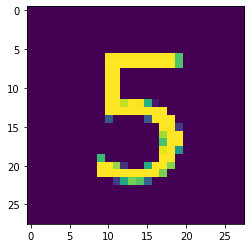

[5]


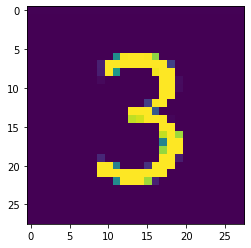

[3]


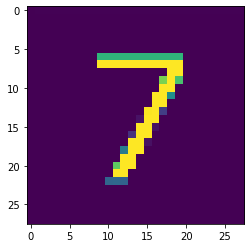

[7]


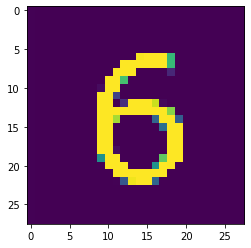

[6]


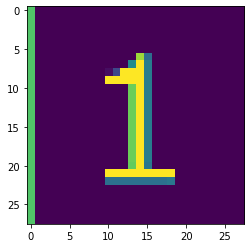

[1]


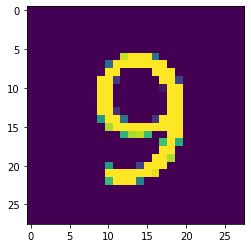

[9]


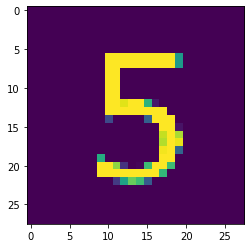

[5]


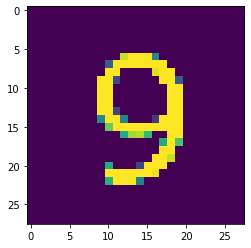

[9]


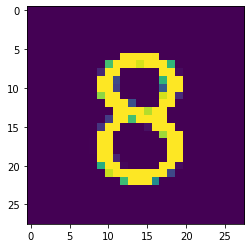

[8]


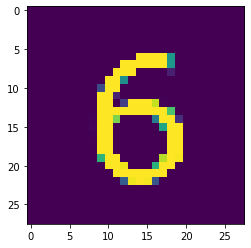

[6]


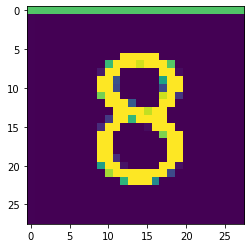

[8]


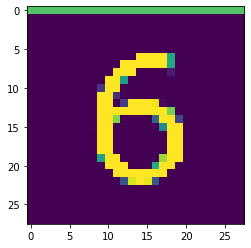

[6]


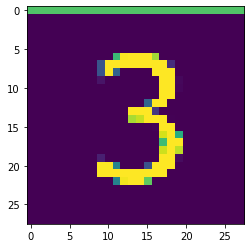

[3]


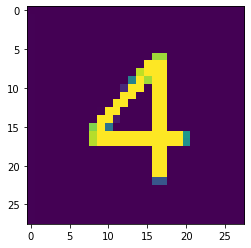

[4]


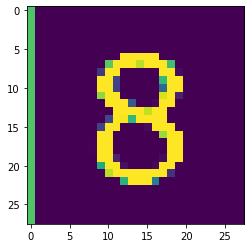

[8]


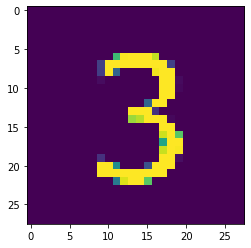

[3]


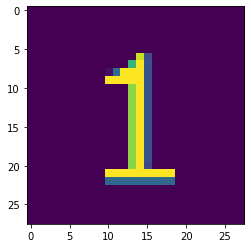

[1]


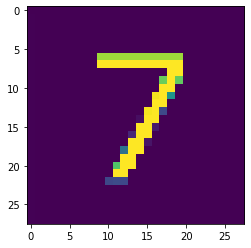

[7]


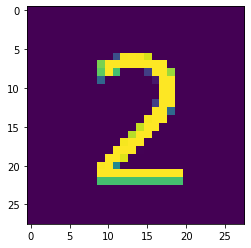

[2]


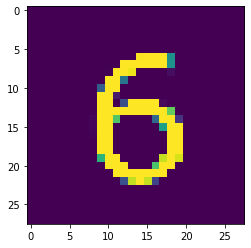

[6]


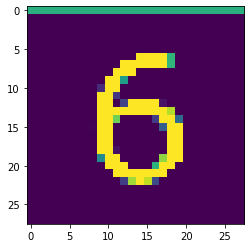

[6]


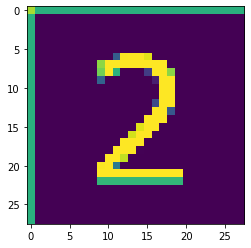

[2]


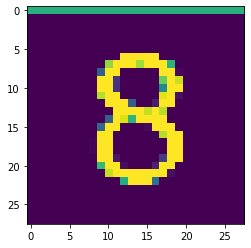

[8]


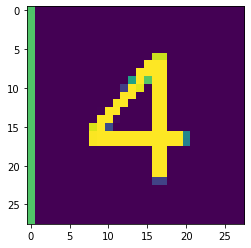

[4]


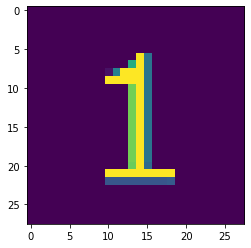

[1]


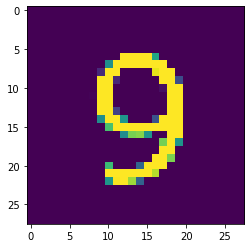

[9]


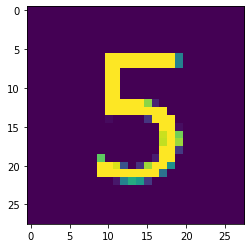

[5]


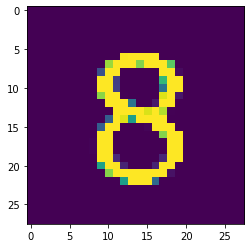

[8]


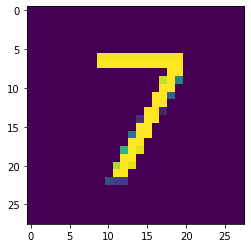

[7]


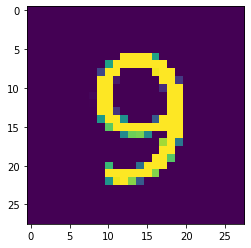

[9]
30


In [21]:
count = 0 
for row in puzzle:
    for spot in row:
        if np.mean(spot) > 15:
            count += 1
            plt.imshow(spot)
            plt.show()
            print(model.predict_classes(spot.reshape(1,28,28,1).astype('float32')/255))
            
print(count)

In [0]:
template = [
    [0 for _ in range(9)] for _ in range(9)
]

In [23]:
template

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [0]:
for i, row in enumerate(puzzle):
    for j, spot in enumerate(row):
        if np.mean(spot) > 15:
            template[i][j] = model.predict_classes(spot.reshape(1,28,28,1).astype('float32')/255)[0]

In [25]:
template


[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]

In [0]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets
import ipywidgets as widgets
import IPython
from IPython.display import display,clear_output
from ipywidgets import Button, HBox, VBox
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import webbrowser
from IPython.display import YouTubeVideo

from fastai.vision import *
from fastai.widgets import *
from fastai.callbacks import*

import copy

In [0]:
row_slider = widgets.IntSlider(
    value=9,
    min=0,
    max=9,
    step=1,
    description='Row :',
)
column_slider = widgets.IntSlider(
    value=9,
    min=0,
    max=9,
    step=1,
    description='Column :',

)

digit_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=9,
    step=1,
    description='Digit :',
)



In [0]:
button1 = widgets.Button(
    description='Grid',
)
button2 = widgets.Button(
    description='Correct',
)
button3 = widgets.Button(
    description='Steps',
)
button4 = widgets.Button(
    description='Reveal_solution',
)
def question(b=None):
    print("Sudoku question")
    for i in range(9): 
        question.row = widgets.ToggleButtons(
          options=template[i],
          description='',
          disabled=False,
          button_style='info', # 'success', 'info', 'warning', 'danger' or ''
        )
        display(question.row) 

def corrections(b=None):
    print("Corrections made in the grid! Click grid to see the corrections")
    row = row_slider.value
    col = column_slider.value
    template[row][col] = digit_slider.value

def steps(b=None):
    print("Solution Step")
    sol = copy.deepcopy(template)
    row = row_slider.value
    col = column_slider.value
    if(solve_sudoku(template)): 
        for i in range(9):
          if i == row:
            for j in range(9):
              if j == col:
                sol[i][j] = template[i][j]
    for i in range(9): 
        steps.row = widgets.ToggleButtons(
          options=sol[i],
          description='',
          disabled=False,
          button_style='success', # 'success', 'info', 'warning', 'danger' or ''
        )
        display(steps.row) 
    

def solution(b=None):
    print("Solution")
    sol = copy.deepcopy(template)
    if(solve_sudoku(sol)): 
      for i in range(9): 
        question.row = widgets.ToggleButtons(
          options=sol[i],
          description='',
          disabled=False,
          button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
        )
        display(question.row) 


@button1.on_click
def Grid_on_click(b):
    question()

@button2.on_click
def Correct_on_click(b):
    corrections()

@button3.on_click
def Steps_on_click(b):
    steps()

@button4.on_click
def Reveal_solution_on_click(b):
    solution()
  
    

In [0]:
tab1 = VBox(children=[row_slider,
                      column_slider,
                      digit_slider,
                      ])
#tab2 = VBox(children=[button])
                                   

In [46]:
tab = widgets.Tab(children=[tab1])
tab.set_title(0, 'Slider')
print(">>Use the slider for input row and column (0-8) for step wise solution and correction of digits")
VBox(children=[tab,button1,button2,button3,button4])


>>Use the slider for input row and column (0-8) for step wise solution and correction of digits


Sudoku question


ToggleButtons(button_style='info', options=(5, 3, 4, 6, 7, 8, 9, 1, 2), value=5)

ToggleButtons(button_style='info', options=(6, 7, 2, 1, 9, 5, 3, 4, 8), value=6)

ToggleButtons(button_style='info', options=(1, 9, 8, 3, 4, 2, 5, 6, 7), value=1)

ToggleButtons(button_style='info', options=(8, 5, 9, 7, 6, 1, 4, 2, 3), value=8)

ToggleButtons(button_style='info', options=(4, 2, 6, 8, 5, 3, 7, 9, 1), value=4)

ToggleButtons(button_style='info', options=(7, 1, 3, 9, 2, 4, 8, 5, 6), value=7)

ToggleButtons(button_style='info', options=(9, 6, 1, 5, 3, 7, 2, 8, 4), value=9)

ToggleButtons(button_style='info', options=(2, 8, 7, 4, 1, 9, 6, 3, 5), value=2)

ToggleButtons(button_style='info', options=(3, 4, 5, 2, 8, 6, 1, 7, 9), value=3)

Solution Step


ToggleButtons(button_style='success', options=(5, 3, 4, 6, 7, 8, 9, 1, 2), value=5)

ToggleButtons(button_style='success', options=(6, 7, 2, 1, 9, 5, 3, 4, 8), value=6)

ToggleButtons(button_style='success', options=(1, 9, 8, 3, 4, 2, 5, 6, 7), value=1)

ToggleButtons(button_style='success', options=(8, 5, 9, 7, 6, 1, 4, 2, 3), value=8)

ToggleButtons(button_style='success', options=(4, 2, 6, 8, 5, 3, 7, 9, 1), value=4)

ToggleButtons(button_style='success', options=(7, 1, 3, 9, 2, 4, 8, 5, 6), value=7)

ToggleButtons(button_style='success', options=(9, 6, 1, 5, 3, 7, 2, 8, 4), value=9)

ToggleButtons(button_style='success', options=(2, 8, 7, 4, 1, 9, 6, 3, 5), value=2)

ToggleButtons(button_style='success', options=(3, 4, 5, 2, 8, 6, 1, 7, 9), value=3)

Solution


ToggleButtons(button_style='warning', options=(5, 3, 4, 6, 7, 8, 9, 1, 2), value=5)

ToggleButtons(button_style='warning', options=(6, 7, 2, 1, 9, 5, 3, 4, 8), value=6)

ToggleButtons(button_style='warning', options=(1, 9, 8, 3, 4, 2, 5, 6, 7), value=1)

ToggleButtons(button_style='warning', options=(8, 5, 9, 7, 6, 1, 4, 2, 3), value=8)

ToggleButtons(button_style='warning', options=(4, 2, 6, 8, 5, 3, 7, 9, 1), value=4)

ToggleButtons(button_style='warning', options=(7, 1, 3, 9, 2, 4, 8, 5, 6), value=7)

ToggleButtons(button_style='warning', options=(9, 6, 1, 5, 3, 7, 2, 8, 4), value=9)

ToggleButtons(button_style='warning', options=(2, 8, 7, 4, 1, 9, 6, 3, 5), value=2)

ToggleButtons(button_style='warning', options=(3, 4, 5, 2, 8, 6, 1, 7, 9), value=3)